### Using census data to predict whether or not an individual's annual income is above $50K
Source: 1994 US census data via UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Adult

#### 1) Loading the data

In [2]:
import pandas as pd
income = pd.read_csv('income.csv', skipinitialspace=True)
income.tail()

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,cap_gain,cap_loss,hrs/week,origin,earns
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


#### 2) Exploring the data


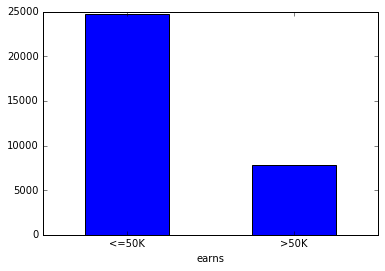

In [7]:
### How balanced are the income classes (earn greater or less than vs less than $50K)?
%matplotlib inline
income.groupby('earns').size().plot(kind = 'bar')


#### 3) Mapping each categorical, non-numerical feature value  to  a numerical label

In [8]:
income_dict = {}
label = 1
for name in income.workclass:
    if name not in income_dict.keys():
        income_dict[name] = label
        label +=1
income_dict

{'?': 6,
 'Federal-gov': 4,
 'Local-gov': 5,
 'Never-worked': 9,
 'Private': 3,
 'Self-emp-inc': 7,
 'Self-emp-not-inc': 2,
 'State-gov': 1,
 'Without-pay': 8}

In [9]:
occ_dict = {}
label = 1
for name in income.occupation:
    if name not in occ_dict.keys():
        occ_dict[name] = label
        label +=1
occ_dict

{'?': 12,
 'Adm-clerical': 1,
 'Armed-Forces': 14,
 'Craft-repair': 7,
 'Exec-managerial': 2,
 'Farming-fishing': 9,
 'Handlers-cleaners': 3,
 'Machine-op-inspct': 10,
 'Other-service': 5,
 'Priv-house-serv': 15,
 'Prof-specialty': 4,
 'Protective-serv': 13,
 'Sales': 6,
 'Tech-support': 11,
 'Transport-moving': 8}

In [10]:
sex_dict = {}
label = 1
for name in income.sex:
    if name not in sex_dict.keys():
        sex_dict[name] = label
        label +=1
sex_dict        

{'Female': 2, 'Male': 1}

In [11]:
race_dict = {}
label = 1
for name in income.race:
    if name not in race_dict.keys():
        race_dict[name] = label
        label +=1
race_dict

{'Amer-Indian-Eskimo': 4,
 'Asian-Pac-Islander': 3,
 'Black': 2,
 'Other': 5,
 'White': 1}

In [12]:
marital_dict = {}
label = 1
for name in income.marital:
    if name not in marital_dict.keys():
        marital_dict[name] = label
        label +=1
marital_dict        

{'Divorced': 3,
 'Married-AF-spouse': 6,
 'Married-civ-spouse': 2,
 'Married-spouse-absent': 4,
 'Never-married': 1,
 'Separated': 5,
 'Widowed': 7}

In [13]:
workclass_dict = {}
label = 1
for name in income.workclass:
    if name not in workclass_dict.keys():
        workclass_dict[name] = label
        label +=1
workclass_dict   

{'?': 6,
 'Federal-gov': 4,
 'Local-gov': 5,
 'Never-worked': 9,
 'Private': 3,
 'Self-emp-inc': 7,
 'Self-emp-not-inc': 2,
 'State-gov': 1,
 'Without-pay': 8}

In [14]:
origin_dict = {}
label = 1
for name in income.origin:
    if name not in origin_dict.keys():
        origin_dict[name] = label
        label +=1
origin_dict    

{'?': 5,
 'Cambodia': 18,
 'Canada': 11,
 'China': 29,
 'Columbia': 17,
 'Cuba': 2,
 'Dominican-Republic': 25,
 'Ecuador': 20,
 'El-Salvador': 26,
 'England': 10,
 'France': 27,
 'Germany': 12,
 'Greece': 36,
 'Guatemala': 28,
 'Haiti': 23,
 'Holand-Netherlands': 42,
 'Honduras': 9,
 'Hong': 39,
 'Hungary': 41,
 'India': 4,
 'Iran': 13,
 'Ireland': 40,
 'Italy': 15,
 'Jamaica': 3,
 'Japan': 30,
 'Laos': 21,
 'Mexico': 6,
 'Nicaragua': 37,
 'Outlying-US(Guam-USVI-etc)': 33,
 'Peru': 32,
 'Philippines': 14,
 'Poland': 16,
 'Portugal': 24,
 'Puerto-Rico': 8,
 'Scotland': 34,
 'South': 7,
 'Taiwan': 22,
 'Thailand': 19,
 'Trinadad&Tobago': 35,
 'United-States': 1,
 'Vietnam': 38,
 'Yugoslavia': 31}

In [15]:
rel_dict = {}
label = 1
for name in income.relationship:
    if name not in rel_dict.keys():
        rel_dict[name] = label
        label +=1
rel_dict     

{'Husband': 2,
 'Not-in-family': 1,
 'Other-relative': 6,
 'Own-child': 4,
 'Unmarried': 5,
 'Wife': 3}

In [16]:
earns_dict = {}
label = 1
for name in income.earns:
    if name not in earns_dict.keys():
        earns_dict[name] = label
        label +=1
earns_dict   

{'<=50K': 1, '>50K': 2}

In [ ]:
#### Mapping the categorical labels to numerical using the above dictionaries

In [19]:
inc = income.copy()
inc['occupation'] = inc['occupation'].map(occ_dict)
inc['marital'] = inc['marital'].map(marital_dict)
inc['relationship'] = inc['relationship'].map(rel_dict)
inc['race'] = inc['race'].map(race_dict)
inc['sex'] = inc['sex'].map(sex_dict)
inc['workclass'] = inc['workclass'].map(workclass_dict)
inc['earns'] = inc['earns'].map(earns_dict)
inc['origin'] = inc['origin'].map(origin_dict)


In [15]:
inc.head()

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,cap_gain,cap_loss,hrs/week,origin,earns
0,39,1,77516,Bachelors,13,1,1,1,1,1,2174,0,40,1,1
1,50,2,83311,Bachelors,13,2,2,2,1,1,0,0,13,1,1
2,38,3,215646,HS-grad,9,3,3,1,1,1,0,0,40,1,1
3,53,3,234721,11th,7,2,3,2,2,1,0,0,40,1,1
4,28,3,338409,Bachelors,13,2,4,3,2,2,0,0,40,2,1


#### Let's drop the 'education' column, since the 'education_num' column already maps the education level to an ordinal list of numbers.

In [20]:
del inc['education']

#### Create the "features" and 'labels' arrays from the data.

In [21]:
import numpy as np
labels_ = inc.earns
del inc['earns']
features_ = np.array(inc)

#### Run a random forest classifier and validate the predictions

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix, accuracy_score

features = features_
labels = labels_
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.25) 
clf = RandomForestClassifier(n_estimators =30, min_samples_split = 16)
clf.fit(features_train,labels_train)  
pred = clf.predict(features_test)
print "accuracy =", accuracy_score(labels_test, pred)

accuracy = 0.869917700528


#### Determine the relative importance of each feature

In [31]:
clf.feature_importances_


array([ 0.10211425,  0.03051758,  0.09050431,  0.15640462,  0.13356108,
        0.06034193,  0.10745805,  0.01063221,  0.01678635,  0.16257296,
        0.0484738 ,  0.06520202,  0.01543084])

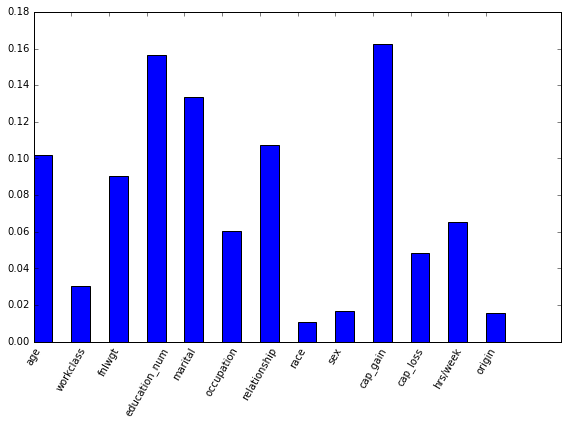

In [32]:
import matplotlib.pyplot as plt
n_cols = len(features[1])
fig = plt.figure(figsize = (8,6))
#ax = fig.add_subplot(1)
rect1 = plt.bar(range(n_cols), clf.feature_importances_, width = 0.5)
plt.xticks(range(n_cols), inc.columns, rotation = 60)
plt.tight_layout()
plt.show()


In [124]:
print confusion_matrix(labels_test, pred)

[[5795  387]
 [ 713 1246]]


In [120]:
for i in range(len(features[1])):
    print inc.columns[i],":",clf.feature_importances_[i]

age : 0.116074878884
workclass : 0.0299445053891
fnlwgt : 0.0999769046953
education_num : 0.146109300428
marital : 0.162787956869
occupation : 0.0620555849933
relationship : 0.0844926906965
cap_gain : 0.183737123214
cap_loss : 0.0510519846971
hrs/week : 0.0637690701322


In [31]:
inc.tail()

,age,workclass,education_num,marital,occupation,relationship,race,sex,cap_gain,cap_loss,hrs/week,origin
32556,27,3,12,2,11,3,1,2,0,0,38,1
32557,40,3,9,2,10,2,1,1,0,0,40,1
32558,58,3,9,7,1,5,1,2,0,0,40,1
32559,22,3,9,1,1,4,1,1,0,0,20,1
32560,52,7,9,2,2,3,1,2,15024,0,40,1


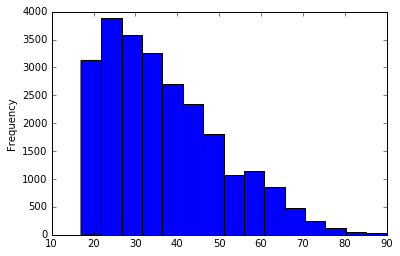

In [42]:
income[income.earns == "<=50K"].age.plot(kind = 'hist', bins = 15)

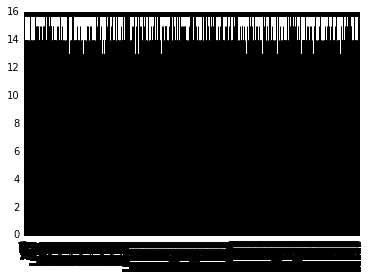

In [34]:
income[income.earns == "<=50K"].education_num.plot(kind = 'bar')

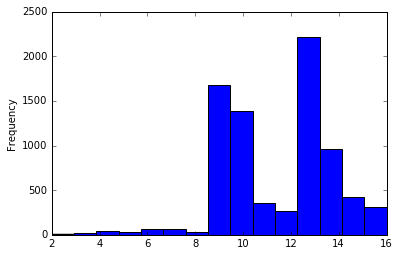

In [35]:
income[income.earns == ">50K"].education_num.plot(kind = 'hist', bins = 15)

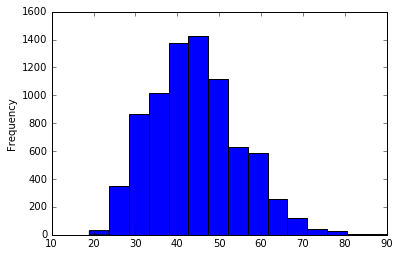

In [33]:
income[income.earns == ">50K"].age.plot(kind = 'hist', bins = 15)

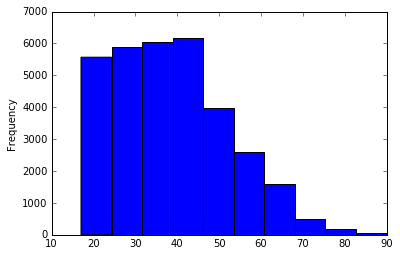

In [65]:
income.age.plot(kind = 'hist')